# Guía 3: Teoría de detección de señales (parte 2)
## Toma de decisiones 2020
### Profesor Guillermo Solovey

---

**Alumno:** Leandro Carreira

**LU:** 669/18

---

# Ejercicio 4

## Simular una ROC empírica.

Considerar un participante de un experimento de detección con $d' = 1.5$.

En cada trial, el experimentador presenta `"ruido"` o `"ruido+señal"` con igual probabilidad.

La tarea del participante es responder `"si"` cuando la señal está presente y `"no"` cuando está ausente.

Considere que el participante adopta un criterio no sesgado y que la distribución de ruido está centrada en cero.

## A.
Simular (como en el ejercicio 7 de la Guía 2), 10000 trials del experimento.

Hacer un histograma de la señal interna correspondiente a cada estímulo.

In [56]:
dp <- 1.5

In [57]:
muN <- 0
muS <- muN + dp

sigma <- 1

In [58]:

# prop=0.2: 20% ruido, 80% señal
prop <- 0.5
ntrials <- 10000
ntrialsN <- ntrials*prop
ntrialsS <- ntrials*(1-prop)

# La información de qué estímulo corresponde a cada trial la vamos a guardar en la
# variable Label:
# señal+ruido ---> 1
# ruido ---> 0
# Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
# ntrialsS y ntrialsN
signalLabels <- rep(1, ntrialsS)
noiseLabels  <- rep(0, ntrialsN)

# Tomar las muestras de cada distribución.
signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigma)
noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigma)

# Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
allSamples <- append(signalSamples, noiseSamples)

# Hacer lo mismo con los vectores de Labels
allLabels <- append(signalLabels, noiseLabels)

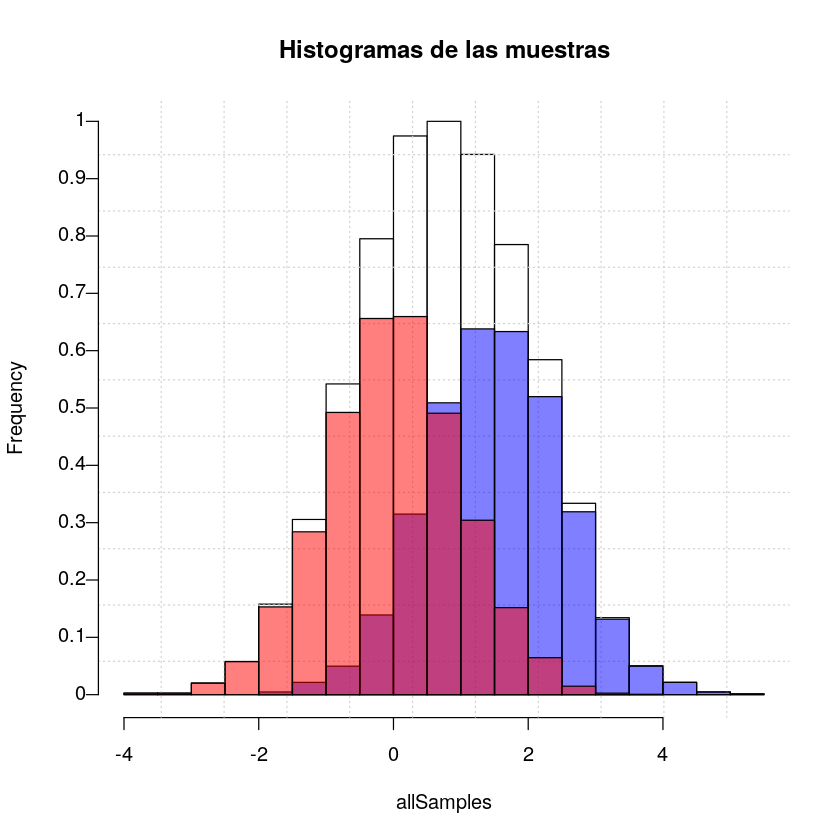

In [59]:
hist(allSamples, col=rgb(1,1,1, 0.5), prob=F, main="Histogramas de las muestras", yaxt="n")
grid(11)
m <- max(hist(allSamples, plot=F)$counts)
ytick<-seq(0, m, length.out=11)
axis(side=2, at=ytick, labels = FALSE)
text(par("usr")[1], ytick,  
     labels = round(ytick/m,2), pos = 2, xpd = TRUE)
hist(signalSamples, prob=F, add=T, col=rgb(0,0,1, 0.5))
hist(noiseSamples, prob=F, add=T, col=rgb(1,0,0, 0.5))

En el histograma anterior observamos ambas distribuciones estimadas superpuestas, con valores de señal a la derecha, y de ruido a la izquierda.

El participante solo "observa" una mezcla de ambas distribuciones, como se ve en blanco en el fondo.

## B.
Suponga que el participante debe reportar, además de su decisión, la confianza en su decisión en una escala de tres unidades: {baja, media, alta}.

Para eso, utiliza 4 criterios nuevos, 2 a cada lado del criterio de decisión ubicados en: (−0.5, 0.2, 1.7, 2.5)

In [60]:
criterios <- c(-0.5, 0.2, dp/2 ,1.7, 2.5)

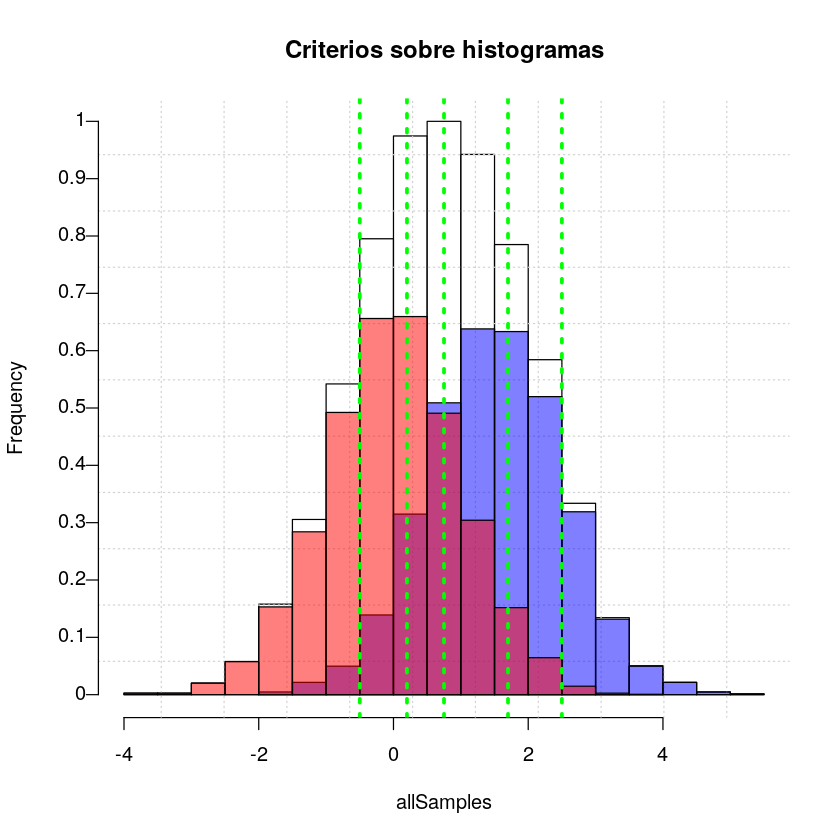

In [61]:
hist(allSamples, col=rgb(1,1,1, 0.5), prob=F, main="Criterios sobre histogramas", yaxt="n")
grid(11)
m <- max(hist(allSamples, plot=F)$counts)
ytick<-seq(0, m, length.out=11)
axis(side=2, at=ytick, labels = FALSE)
text(par("usr")[1], ytick,  
     labels = round(ytick/m,2), pos = 2, xpd = TRUE)
hist(signalSamples, prob=F, add=T, col=rgb(0,0,1, 0.5))
hist(noiseSamples, prob=F, add=T, col=rgb(1,0,0, 0.5))
abline(v=criterios, col='green', lwd=3, lty=3)

## C.

Crear una matriz de $2 \times 6$ que contenga el número de respuestas de cada tipo:

In [62]:
decisiones <- data.frame(no.alta=rep(0,2),
                         no.media=rep(0,2),
                         no.baja=rep(0,2),
                         si.baja=rep(0,2),
                         si.media=rep(0,2),
                         si.alta=rep(0,2))
rownames(decisiones) <- c('ruido','señal') 
decisiones

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
ruido,0,0,0,0,0,0
señal,0,0,0,0,0,0


In [63]:
decisiones['ruido', 1] <- sum(noiseSamples < criterios[1])
decisiones['señal', 1] <- sum(signalSamples < criterios[1])

for(c in 2:5){
    decisiones['ruido', c] <- sum(noiseSamples  > criterios[c-1] & noiseSamples  < criterios[c])
    decisiones['señal', c] <- sum(signalSamples > criterios[c-1] & signalSamples < criterios[c])
}

decisiones['ruido', 6] <- sum(noiseSamples  > criterios[5])
decisiones['señal', 6] <- sum(signalSamples > criterios[5])

decisiones

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
ruido,1508,1385,948,926,206,27
señal,113,353,667,1770,1311,786


In [64]:
#Verifico valores
sum(decisiones['ruido',])
sum(decisiones['señal',])

[1] 5000

[1] 5000

## D.

Graficar la curva ROC empírica.

Para eso dividir cada entrada de la matriz anterior por el número total de trials de cada tipo y acumular los valores, de derecha a izquierda.

In [65]:
tasas <- decisiones/5000
rownames(tasas) <- c('fa', 'hit')
tasas

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
fa,0.3016,0.2770,0.1896,0.1852,0.0412,0.0054
hit,0.0226,0.0706,0.1334,0.3540,0.2622,0.1572


In [66]:
ROC.n <- rep(NA, 6)
ROC.s <- rep(NA, 6)

for(i in 6:1){
    ROC.n[i] <- sum(tasas['fa', 6:i])
    ROC.s[i] <- sum(tasas['hit', 6:i])
}

#ROC.n
#ROC.s

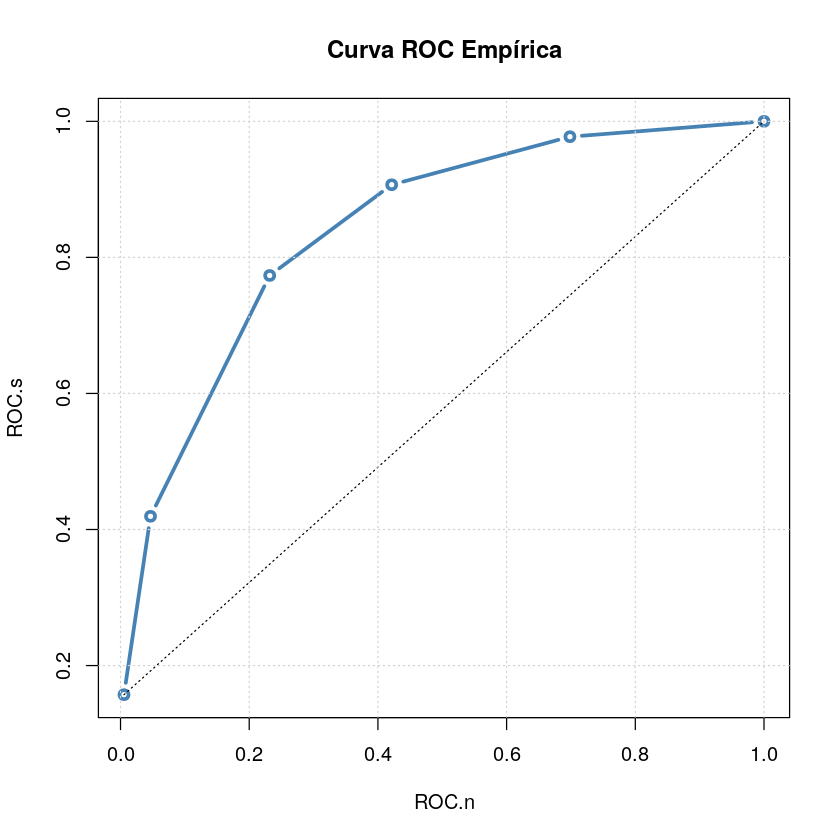

In [67]:
plot(ROC.n, ROC.s, type='b', lwd=3, col='steelblue', main="Curva ROC Empírica")
lines(c(ROC.n[6], ROC.n[1]), c(ROC.s[6], ROC.s[1]), lty=3)
grid()